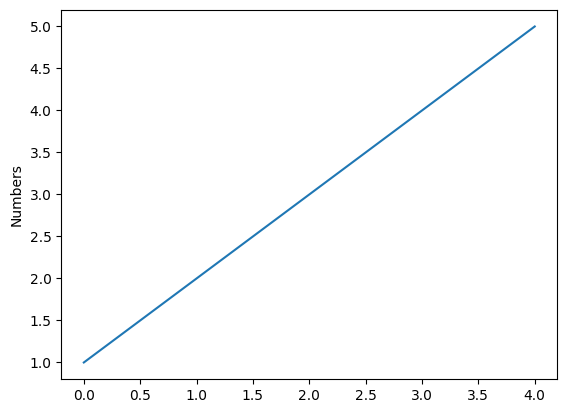

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5])
plt.ylabel('Numbers')
plt.show()